# (Dé)Montrez numériquement que la médiane d'échantillon est bien un estimateur de la moyenne de la population moins efficace que la moyenne d'échantillon

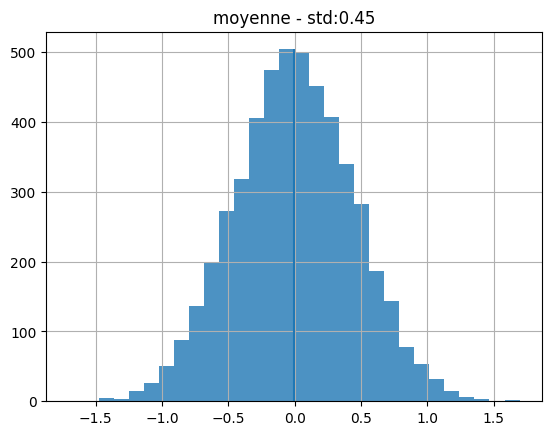

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

population_size = 100000
sigma = 1
center = 0

population_df = pd.DataFrame(np.random.normal(size=population_size,loc=center,scale=sigma))

n_samples = 5000
sample_size = 5

estimateur_df = pd.DataFrame()

random.seed(4242)

moyenne_list = []
mediane_list = []
for i_sample in range(0,n_samples):
    sample_list = population_df.sample(sample_size)
    moyenne_list.append(np.mean(sample_list))
    mediane_list.append(np.median(sample_list))

estimateur_df = pd.DataFrame()
estimateur_df['moyenne'] = moyenne_list
estimateur_df['mediane'] = mediane_list

n_bins = 30

estimateur_df['moyenne'].hist(bins=n_bins, alpha=0.8)
plt.vlines(estimateur_df['moyenne'].mean(),ymin=0,ymax=np.histogram(estimateur_df['moyenne'], bins=n_bins)[0].max())
plt.title('moyenne - std:{0:.2f}'.format(estimateur_df['moyenne'].std()))
plt.show()

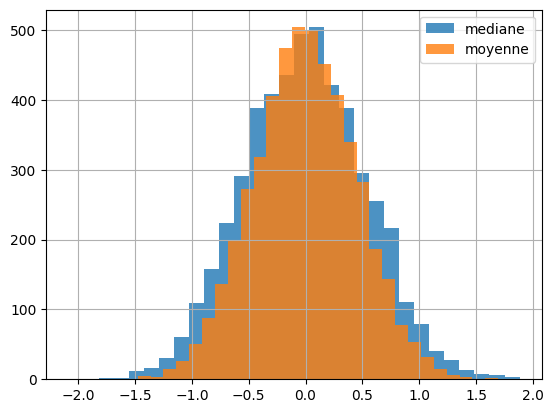

In [28]:
estimateur_df['mediane'].hist(label='mediane',alpha=0.8, bins=n_bins)
estimateur_df['moyenne'].hist(label='moyenne',alpha=0.8, bins=n_bins)
plt.legend()
plt.show()

In [35]:
# ecart type mediane
math.sqrt(np.var(estimateur_df['mediane'], ddof=0)) 

0.5353516985019604

In [34]:
# ecart type moyenne
math.sqrt(np.var(estimateur_df['moyenne'], ddof=0)) 

0.4485305114700179

In [33]:
# ecart type mediane / ecart type moyenne
math.sqrt(np.var(estimateur_df['mediane'], ddof=0))/math.sqrt(np.var(estimateur_df['moyenne'], ddof=0)) 

1.1935680735461986

In [32]:
math.sqrt(math.pi/2)

1.2533141373155001

En gros, le fait que l'écart type de la moyenne soit plus petit que celui de la médianne prouve que cet estimateur est plus efficace